# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = {'area': [3456,2089,1416,5000,6325,3255,4255,6255], 'price':[600,395,232,800,922,525,500,555] }

In [3]:
data

{'area': [3456, 2089, 1416, 5000, 6325, 3255, 4255, 6255],
 'price': [600, 395, 232, 800, 922, 525, 500, 555]}

In [4]:
df=pd.DataFrame(data=data)
df

,area,price
0,3456,600
1,2089,395
2,1416,232
3,5000,800
4,6325,922
5,3255,525
6,4255,500
7,6255,555


Text(0, 0.5, 'price')

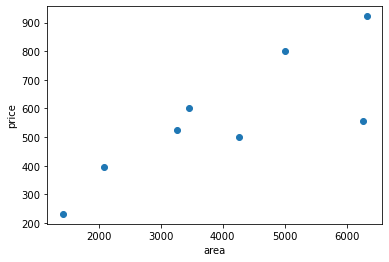

In [5]:
plt.scatter(df['area'],df['price'])
plt.xlabel('area')
plt.ylabel('price')

In [6]:
# Linear Regression using Diabetes Data
# Code source: Jaques Grobler
# License: BSD 3 clause

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score 

In [7]:
# Load the diabetes dataset
# this will return both the response and prediction as x and y
diabetes_x,diabetes_y = datasets.load_diabetes(return_X_y=True)

In [8]:
# these are features
diabetes_x.shape

(442, 10)

In [9]:
# this is targets
diabetes_y.shape

(442,)

In [10]:
# lets load dta from diabetes_x, however we will only load the One feature (3rd one)
# we are creating a new axis so we can describe each datapoint as a separate input
diabetes_x_new = diabetes_x[:, np.newaxis, 2]
print('original data: ',diabetes_x[0:5,2])
print('reformatted data: ',diabetes_x_new[0:5])

original data:  [ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469]
reformatted data:  [[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]


In [11]:
# Identify number of samples = 442
print(diabetes_x_new.shape)

(442, 1)


In [12]:
# Split the data into training/testing sets 
# The last 20 samples are selected as testing and every sample before it as training
# the same split is applied to the predictor variable as well
diabetes_x_new_train1 = diabetes_x_new[:-20]
diabetes_x_new_test1 = diabetes_x_new[-20:]
diabetes_y_new_train1 = diabetes_y[:-20]
diabetes_y_new_test1 = diabetes_y[-20:]
print('Length of training set', len(diabetes_x_new_train1))
print('Length of testing set', len(diabetes_x_new_test1))

Length of training set 422
Length of testing set 20


In [13]:
# Split the data into training/testing sets 
# The last 100 samples are selected as testing and every sample before it as training
# the same split is applied to the predictor variable as well
diabetes_x_new_train2 = diabetes_x_new[:-100]
diabetes_x_new_test2 = diabetes_x_new[-100:]
diabetes_y_new_train2 = diabetes_y[:-100]
diabetes_y_new_test2 = diabetes_y[-100:]
print('Length of training set', len(diabetes_x_new_train2))
print('Length of testing set', len(diabetes_x_new_test2))

Length of training set 342
Length of testing set 100


In [14]:
# Create linear regression object and train using first train sample
regr1 = linear_model.LinearRegression()
regr1.fit(diabetes_x_new_train1, diabetes_y_new_train1)
regr1

LinearRegression()

In [15]:
# Create linear regression object and train using second train sample
regr2 = linear_model.LinearRegression()
regr2.fit(diabetes_x_new_train2, diabetes_y_new_train2)

LinearRegression()

In [16]:
# predict the values using test data for sample 1
diabetes_y_new_pred1=regr1.predict(diabetes_x_new_test1)
diabetes_y_new_pred1

array([225.9732401 , 115.74763374, 163.27610621, 114.73638965,
       120.80385422, 158.21988574, 236.08568105, 121.81509832,
        99.56772822, 123.83758651, 204.73711411,  96.53399594,
       154.17490936, 130.91629517,  83.3878227 , 171.36605897,
       137.99500384, 137.99500384, 189.56845268,  84.3990668 ])

In [17]:
# predict the values using test data for sample 2
diabetes_y_new_pred2=regr1.predict(diabetes_x_new_test2)
diabetes_y_new_pred2

array([173.38854716, 170.35481488, 142.03998022, 150.12993298,
       169.34357078, 124.8488306 , 133.95002746,  98.55648413,
       209.79333458, 114.73638965,  85.41031089, 100.57897232,
       195.63591725, 144.06246841, 121.81509832, 199.68089363,
        73.27538175, 158.21988574, 172.37730307, 146.0849566 ,
       251.25434248, 129.90505108, 147.09620069, 116.75887784,
       281.59166533, 312.94023228, 155.18615345, 188.55720859,
        98.55648413, 144.06246841, 130.91629517, 143.05122431,
       120.80385422, 150.12993298, 216.87204325, 162.26486212,
       155.18615345, 116.75887784, 177.43352354,  69.23040537,
       209.79333458, 125.8600747 , 124.8488306 , 134.96127155,
       114.73638965, 167.32108259, 129.90505108, 154.17490936,
       217.88328734,  87.43279908, 124.8488306 , 109.68016917,
       170.35481488, 154.17490936, 123.83758651, 149.11868888,
       167.32108259, 174.39979126, 195.63591725, 110.69141327,
       121.81509832, 244.17563381, 203.72587001, 268.44

In [18]:
# The coefficients
print('Coefficients for model  with testing sample of 20: {}'.format(regr1.coef_))
# The mean squared error
print("Mean squared error for model  with testing sample of 20: %.2f"
      % mean_squared_error(diabetes_y_new_test1, diabetes_y_new_pred1))
# Explained variance score: 1 is perfect prediction
print('R-square for model  with testing sample of 20: %.2f \n' % r2_score(diabetes_y_new_test1, diabetes_y_new_pred1))

# The coefficients
print('Coefficients for model  with testing sample of 100: {}'.format(regr2.coef_))
# The mean squared error
print("Mean squared error for model  with testing sample of 100: %.2f"
      % mean_squared_error(diabetes_y_new_test2, diabetes_y_new_pred2))
# Explained variance score: 1 is perfect prediction
print('R-square for model  with testing sample of 100: %.2f \n' % r2_score(diabetes_y_new_test2, diabetes_y_new_pred2))

Coefficients for model  with testing sample of 20: [938.23786125]
Mean squared error for model  with testing sample of 20: 2548.07
R-square for model  with testing sample of 20: 0.47 

Coefficients for model  with testing sample of 100: [953.3606272]
Mean squared error for model  with testing sample of 100: 3753.39
R-square for model  with testing sample of 100: 0.38 



Text(0.5, 1.0, "['Model with 100 sample']")

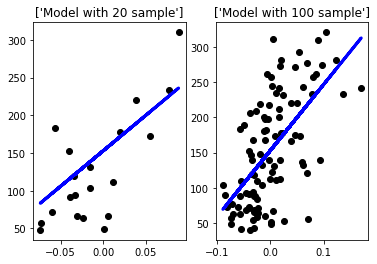

In [19]:
# Plot outputs
fig1,([ax1,ax2])=plt.subplots(1,2)
ax1.scatter(diabetes_x_new_test1, diabetes_y_new_test1,  color='black')
ax1.plot(diabetes_x_new_test1, diabetes_y_new_pred1,  color='blue', linewidth=3)
ax1.set_title(['Model with 20 sample'])

ax2.scatter(diabetes_x_new_test2, diabetes_y_new_test2,  color='black')
ax2.plot(diabetes_x_new_test2, diabetes_y_new_pred2,  color='blue', linewidth=3)
ax2.set_title(['Model with 100 sample'])

In [21]:
## Lets run the regression Model by using all the features
# Create linear regression object and train using first train sample
## first lets convert the features and targets to dataframe for easy visualization
diabetes_x_df=pd.DataFrame(diabetes_x)
diabetes_x_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [22]:
diabetes_x_df.to_csv('diabetes_features.csv')

In [23]:
diabetes_y_df=pd.DataFrame(diabetes_y)
diabetes_y_df.head()

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [24]:
diabetes_y_df.to_csv('diabetes_response.csv')

In [25]:
# Split the data into training/testing sets 
# The last 20 samples are selected as testing and every sample before it as training
# the same split is applied to the predictor variable as well
diabetes_x_df_train1 = diabetes_x_df.iloc[:-20,:]
diabetes_x_df_test1 = diabetes_x_df.iloc[-20:,:]
print('Shape of train sample', diabetes_x_df_train1.shape)
print('Shape of test sample', diabetes_x_df_test1.shape)
diabetes_y_df_train1 = diabetes_y_df.iloc[:-20]
diabetes_y_df_test1 = diabetes_y_df.iloc[-20:]


Shape of train sample (422, 10)
Shape of test sample (20, 10)


In [26]:
# Create linear regression object and train using first train sample
regr1_allfeature = linear_model.LinearRegression()
regr1_allfeature.fit(diabetes_x_df_train1, diabetes_y_df_train1)

# predict the values using test data for sample 1
diabetes_y_df_pred1=regr1_allfeature.predict(diabetes_x_df_test1)
diabetes_y_df_pred1

array([[197.61846908],
       [155.43979328],
       [172.88665147],
       [111.53537279],
       [164.80054784],
       [131.06954875],
       [259.12237761],
       [100.47935157],
       [117.0601052 ],
       [124.30503555],
       [218.36632793],
       [ 61.19831284],
       [132.25046751],
       [120.3332925 ],
       [ 52.54458691],
       [194.03798088],
       [102.57139702],
       [123.56604987],
       [211.0346317 ],
       [ 52.60335674]])

In [27]:
# The coefficients
print('Coefficients for model  with testing sample of 20: {}'.format(regr1_allfeature.coef_))
# The mean squared error
print("Mean squared error for model  with testing sample of 20: %.2f"
      % mean_squared_error(diabetes_y_df_test1, diabetes_y_df_pred1))
# Explained variance score: 1 is perfect prediction
print('R-square for model  with testing sample of 20: %.2f \n' % r2_score(diabetes_y_df_test1, diabetes_y_df_pred1))

Coefficients for model  with testing sample of 20: [[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
  -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
   7.43519617e+02  7.60951722e+01]]
Mean squared error for model  with testing sample of 20: 2004.57
R-square for model  with testing sample of 20: 0.59 



In [28]:
## ridge regression with cross-validation
RidgeCV_df=linear_model.RidgeCV()
RidgeCV_df

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [29]:
RidgeCV_df.fit(diabetes_x_df_train1,diabetes_y_df_train1)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [30]:
diabetes_y_df_pred1_ridge=RidgeCV_df.predict(diabetes_x_df_test1)
diabetes_y_df_pred1_ridge

array([[195.01911216],
       [153.17149511],
       [169.39544476],
       [106.01296055],
       [166.5133624 ],
       [133.75708257],
       [257.43812783],
       [103.063527  ],
       [117.87817227],
       [123.59757023],
       [216.24272342],
       [ 66.88652254],
       [136.95957319],
       [122.35356866],
       [ 57.84501965],
       [190.51188353],
       [110.6371237 ],
       [129.5404851 ],
       [203.47164445],
       [ 52.50623249]])

In [33]:
# The coefficients
print('Coefficients for model  with testing sample of 20 and ridge regression: {}'.format(RidgeCV_df.coef_))
# The mean squared error
print("Mean squared error for model  with testing sample of 20 and ridge regression: %.2f"
      % mean_squared_error(diabetes_y_df_test1, diabetes_y_df_pred1_ridge))
# Explained variance score: 1 is perfect prediction
print('R-square for model with testing sample of 20 and ridge regression:%.2f \n' % r2_score(diabetes_y_df_test1, diabetes_y_df_pred1_ridge))
 
# The coefficients
print('Coefficients for model  with testing sample of 20 and linear regression: {}'.format(regr1_allfeature.coef_))
# The mean squared error
print("Mean squared error for model  with testing sample of 20 and linear regression: %.2f"
      % mean_squared_error(diabetes_y_df_test1, diabetes_y_df_pred1))
# Explained variance score: 1 is perfect prediction
print('R-square for model  with testing sample of 20 and linear regression: %.2f \n' % r2_score(diabetes_y_df_test1, diabetes_y_df_pred1))

Coefficients for model  with testing sample of 20 and ridge regression: [[  11.1136556  -204.19946801  480.69629861  303.83348865  -88.06728559
   -66.87260956 -193.14729968  119.53475526  430.10894133   95.56293006]]
Mean squared error for model  with testing sample of 20 and ridge regression: 2074.55
R-square for model with testing sample of 20 and ridge regression:0.57 

Coefficients for model  with testing sample of 20 and linear regression: [[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
  -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
   7.43519617e+02  7.60951722e+01]]
Mean squared error for model  with testing sample of 20 and linear regression: 2004.57
R-square for model  with testing sample of 20 and linear regression: 0.59 

